<a href="https://colab.research.google.com/github/f-bndk/test_completed/blob/main/RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальный проект: школа DA – анализ данных Real Estate

В этом задании вам нужно будет проанализировать данные об объектах недвижимости в России на период 2018-2021.

Ссылка на данные: https://drive.google.com/file/d/10Ns8WiQu_5Ys6iSQrm_oPGgRTMG4wpTK/view?usp=sharing

В таблице хранится информация о более 600 тыс объектах недвижимости. Данные собраны с различных интернет-порталов.

В таблице 13 полей:
* `date` - дата публикации объявления
* `time` - время публикации объявления
* `geo_lat` - широта (координаты объекта)
* `geo_lon` - долгота (координаты объекта)
* `region` - регион
* `building_type` - тип строения. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
* `object_type` - тип объекта недвижимости. 1 - Secondary real estate market; 2 - New building;
* `level` - этаж
* `levels` - количество этажей
* `rooms` - количество комнат. Значение -1 означает студию.
* `area` - площадь объекта
* `kitchen_area` - площадь кухни
* `price` - цена в рублях

Предупреждение: в данных могут быть ошибки / выбросы / аномалии из-за технических ошибок. К сожалению, на практике такое часто случается :) При необходимости вы можете использовать дополнительные данные из внешних источников.




## Вопросы



1. Наблюдается ли сезонность в динамике количества опубликованных объявлений?
2. Какие квартиры самые дорогие? Составьте описательный портрет.
3. Какие квартиры самые дешевые? Составьте описательный портрет.
4. Как ведут себя цены на недвижимость в динамике?
5. Есть ли в таблице аномально странные объекты? Например, объекты со слишком дорогой ценой или слишком большим количеством комнат? Приведите примеры конкретных объектов.
6. В каких регионах рынок недвижимости растет? А в каких падает?
7. В покупку квартир какого сегмента вы бы инветировали и почему?

Для ответов на вопросы не забывайте делать соответсвующую визуализацию. Если у вас возникнут какие-то трудности – обязательно пишите ассистенту или куратору.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.style.use(['ggplot'])
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving Real_estate.csv to Real_estate.csv


In [ ]:
data = pd.read_csv("Real_estate.csv", encoding='cp437')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     600000 non-null  int64  
 1   price          600000 non-null  int64  
 2   date           600000 non-null  object 
 3   time           600000 non-null  object 
 4   geo_lat        600000 non-null  float64
 5   geo_lon        600000 non-null  float64
 6   region         600000 non-null  int64  
 7   building_type  600000 non-null  int64  
 8   level          600000 non-null  int64  
 9   levels         600000 non-null  int64  
 10  rooms          600000 non-null  int64  
 11  area           600000 non-null  float64
 12  kitchen_area   600000 non-null  float64
 13  object_type    600000 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 64.1+ MB


In [ ]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

      Column_Name  Num_Unique
13    object_type           2
7   building_type           6
10          rooms          11
8           level          39
9          levels          39
6          region          82
2            date         983
12   kitchen_area        2869
11           area        8012
1           price       68951
3            time       84808
4         geo_lat      172906
5         geo_lon      173152
0      Unnamed: 0      600000


In [ ]:
data[
    (data['rooms'] < -1) | (data['price'] < 0) | (data['levels'] > 57) | (data['object_type'] < 0) | (data['area'] < 10) | (data['area'] > 2000) |
    (data['kitchen_area'] >370) | (data['kitchen_area'] < 4)
    ].empty

False

In [ ]:
df=data.loc[(data['rooms'] >= -1) & (data["price"] > 0) & (data["area"] >= 11) & (data["area"] <= 2000) &
            (data["kitchen_area"] <= 370) & (data["kitchen_area"] >= 4)]

In [ ]:
df[
    (df['rooms'] < -1) | (df['price'] < 0) | (df['levels'] > 57) | (df['object_type'] < 0) | (df['area'] < 10) | (df['area'] > 2000) |
    (df['kitchen_area'] >370) | (df['kitchen_area'] < 4)
    ].empty

True

In [ ]:
dct1 = {0: "Другой",
       1: "Панельный",
       2: "Монолитный",
       3: "Кирпичный",
       4: "Блочный",
       5: "Деревянный"}

df.replace({"building_type": dct1}, inplace=True)

In [ ]:
dct2 = {1: "Вторичное жильё",
       11: "Новостройка"}

df.replace({"object_type": dct2}, inplace=True)

In [ ]:
df=df.astype({'rooms':np.int8, 'levels':np.int8, 'area':np.float32, 'kitchen_area':np.float32})
df.info()

In [ ]:
df_rgn=df.groupby('region').mean()[['geo_lat', 'geo_lon']]

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def loc_region(Latitude, Longtitude):
  location = (geolocator.reverse(Latitude+","+Longtitude ))
  address = location.raw['address']
  region = address.get('state', '')
  return region

In [ ]:
df_rgn=df.groupby('region').mean()[['geo_lat', 'geo_lon']].astype(str)

In [ ]:
df_rgn['region_name']=df_rgn.apply(lambda x: loc_region(x['geo_lat'], x['geo_lon']), axis=1)

In [ ]:
df_rgn.reset_index(inplace=True)

In [ ]:
#присоединены имена регионов по коду региона
df_jnd=df.merge(df_rgn, on='region', how='left')

In [ ]:
#Похоже geocoder не смог раскодировать один из регионов, не знаю что делать с "пустым" регионом без названия

In [ ]:
#удалены лишнии столбцы
df_jnd.drop(df_jnd.columns[[14, 15]], inplace=True, axis=1)

In [ ]:
#присвоено имя первому столбцу
df_jnd.rename(columns={'Unnamed: 0':'advert'}, inplace=True)
#df_jnd.set_index('advert', inplace=True)

In [ ]:
#сокращены длинные названия регионов
df_jnd['region_name'] = df_jnd['region_name'].apply(lambda x: x.replace("область", "обл."))
df_jnd['region_name'].replace(["Ямало-Ненецкий автономный округ", "Ханты-Мансийский автономный округ — Югра"],
                              ("ЯНАО", "ХМАО — Югра"), inplace=True)

In [ ]:
df_jnd.price.describe(percentiles=[.001, 0.999]).to_frame().T

,count,mean,std,min,0.1%,50%,99.9%,max
price,586066.0,4.570557e+06,1.497389e+07,10.0,202325.0,3000000.0,8.669721e+07,2.083290e+09


In [ ]:
#датафрейм без регионов Москва и СПб
df_rem=df_jnd[(df_jnd['region_name'] != "Москва") & (df_jnd['region_name'] != "Санкт-Петербург")]

In [ ]:
#статистические данные
df_rem.price.describe(percentiles=[.002, 0.9988]).to_frame().T

,count,mean,std,min,0.2%,50%,99.9%,max
price,430902.0,3.157711e+06,1.516318e+07,10.0,350000.0,2500000.0,25000000.0,2.083290e+09


In [ ]:
#удаляются данные <0.2 и >99.9 перцентилей
df_rem=df_rem.loc[(df_rem["price"] > 350000) & (df_rem["price"] <= 25000000)]

In [ ]:
df_rem.sort_values(by='price', ascending=False).head()

In [ ]:
#самые дорогие и самые дешевые квартиры
df_rem.price.describe(percentiles=[.03, 0.97]).to_frame().T

,count,mean,std,min,3%,50%,97%,max
price,429521.0,2.967591e+06,1.951170e+06,352394.0,990000.0,2500000.0,7500000.0,25000000.0


In [ ]:
#самые дорогие квартиры
df_remH=df_rem.loc[df_rem["price"] > 7500000]

Text(0, 0.5, '')

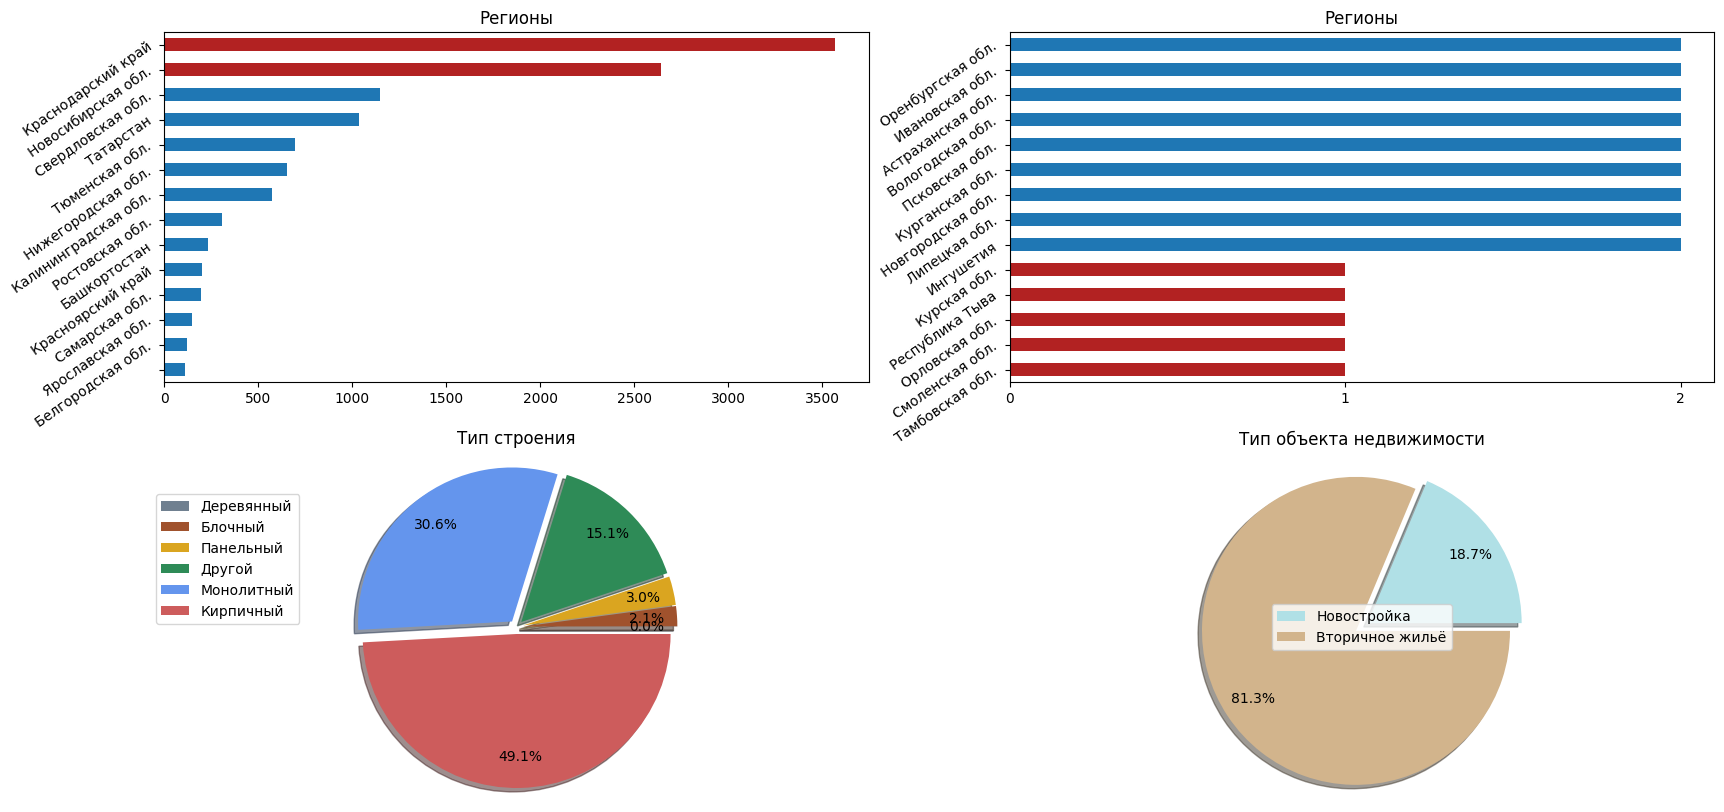

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','firebrick','firebrick']
df_remH['region_name'].value_counts().head(14).sort_values().plot(kind='barh', color=colors, ax=ax1)
ax1.tick_params(axis='y', labelrotation=35)
ax1.set_title("Регионы")

colors = ['firebrick','firebrick','firebrick','firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4']
df_remH['region_name'].value_counts()[-14:].sort_values().plot(kind='barh', color=colors, ax=ax2)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 1))
ax2.tick_params(axis='y', labelrotation=35)
plt.xticks(ha='right')
ax2.set_title("Регионы")

#df_remH['building_type'].value_counts().sort_values().plot(kind='barh', ax=ax3)
colors = ['slategray', 'sienna', 'goldenrod', 'seagreen', 'cornflowerblue','indianred']
df_remH['building_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05,0.05, 0.05,0.05, 0.05],
                                                           shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax3)
ax3.legend(bbox_to_anchor=(-0.1, 0.9), loc='upper right')
ax3.set_title("Тип строения")
ax3.set_ylabel('')

colors = ['powderblue', 'tan']
df_remH['object_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05],
                                                         shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax4)
ax4.set_title("Тип объекта недвижимости")
ax4.set_ylabel('')

plt.show()

Text(0.5, 1.0, 'Этаж')

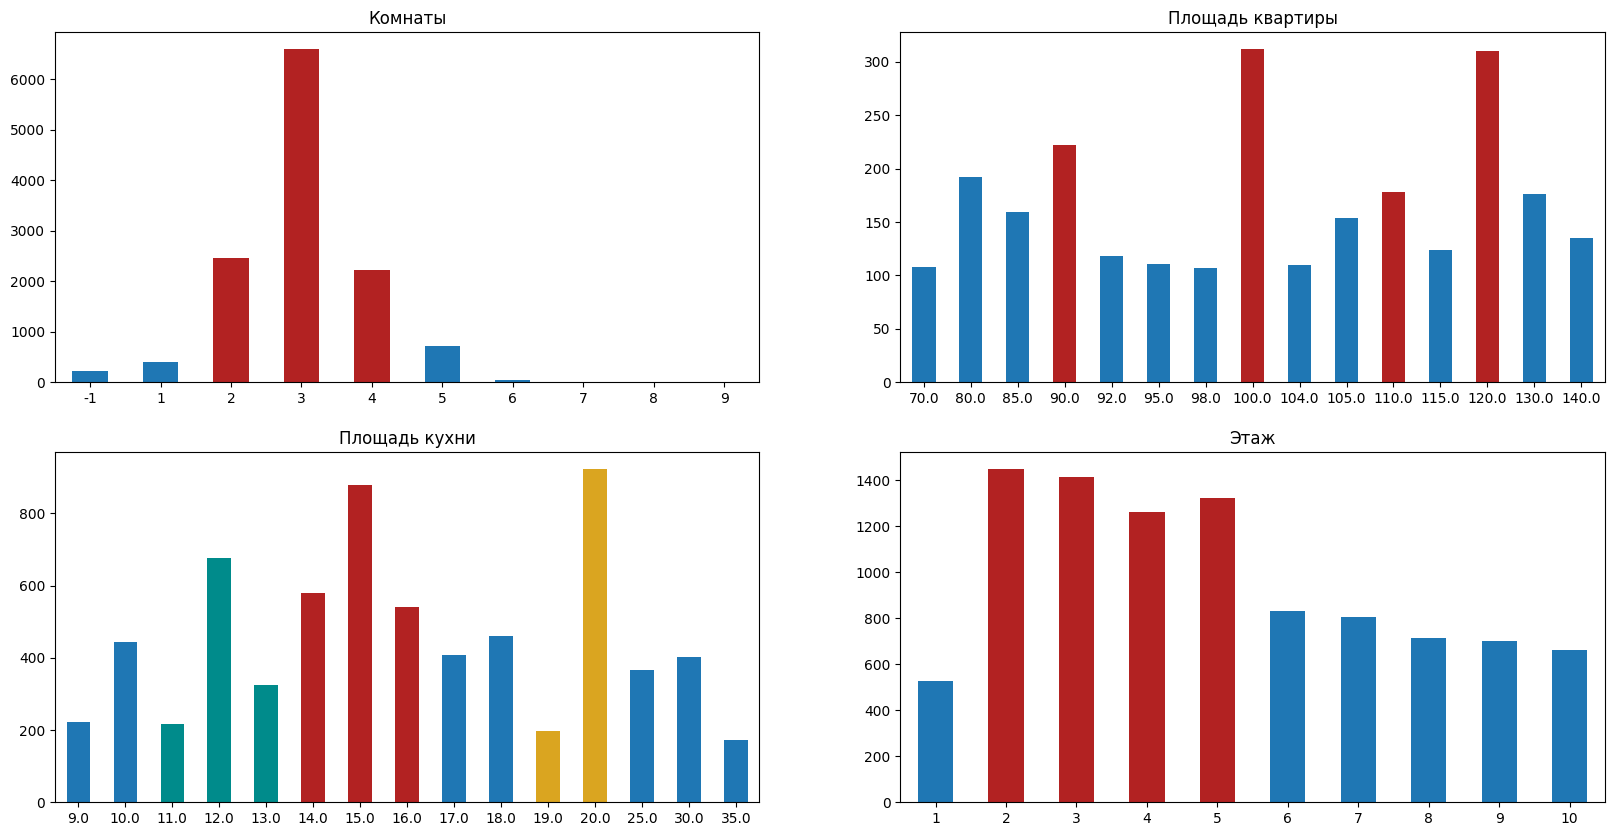

In [ ]:
#почему лейблы по оси х повернуты на 90 градусов по умолчанию? Чтобы исправить добавил ax.tick_params
figH, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4','#1f77b4','firebrick','firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4']
df_remH['rooms'].value_counts().sort_index().plot(kind='bar', color=colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Комнаты")

colors = ['#1f77b4','#1f77b4','#1f77b4','firebrick','#1f77b4','#1f77b4', '#1f77b4',
          'firebrick','#1f77b4','#1f77b4','firebrick','#1f77b4','firebrick','#1f77b4','#1f77b4']
df_remH['area'].value_counts().head(15).sort_index().plot(kind='bar', color=colors, ax=ax2)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_title("Площадь квартиры")

colors = ['#1f77b4','#1f77b4','darkcyan','darkcyan','darkcyan','firebrick', 'firebrick',
          'firebrick','#1f77b4','#1f77b4','goldenrod','goldenrod','#1f77b4','#1f77b4','#1f77b4']
df_remH['kitchen_area'].value_counts().head(15).sort_index().plot(kind='bar', color=colors, ax=ax3)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_title("Площадь кухни")

colors = ['#1f77b4','firebrick','firebrick','firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4']
df_remH['level'].value_counts().head(10).sort_index().plot(kind='bar', color=colors, ax=ax4)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_title("Этаж")
plt.show()

In [ ]:
df_remH['level'].value_counts()

In [ ]:
#самые дешевые квартиры
df_remL=df_rem.loc[df_rem["price"] < 990000]

Text(0.5, 1.0, 'Тип объекта недвижимости')

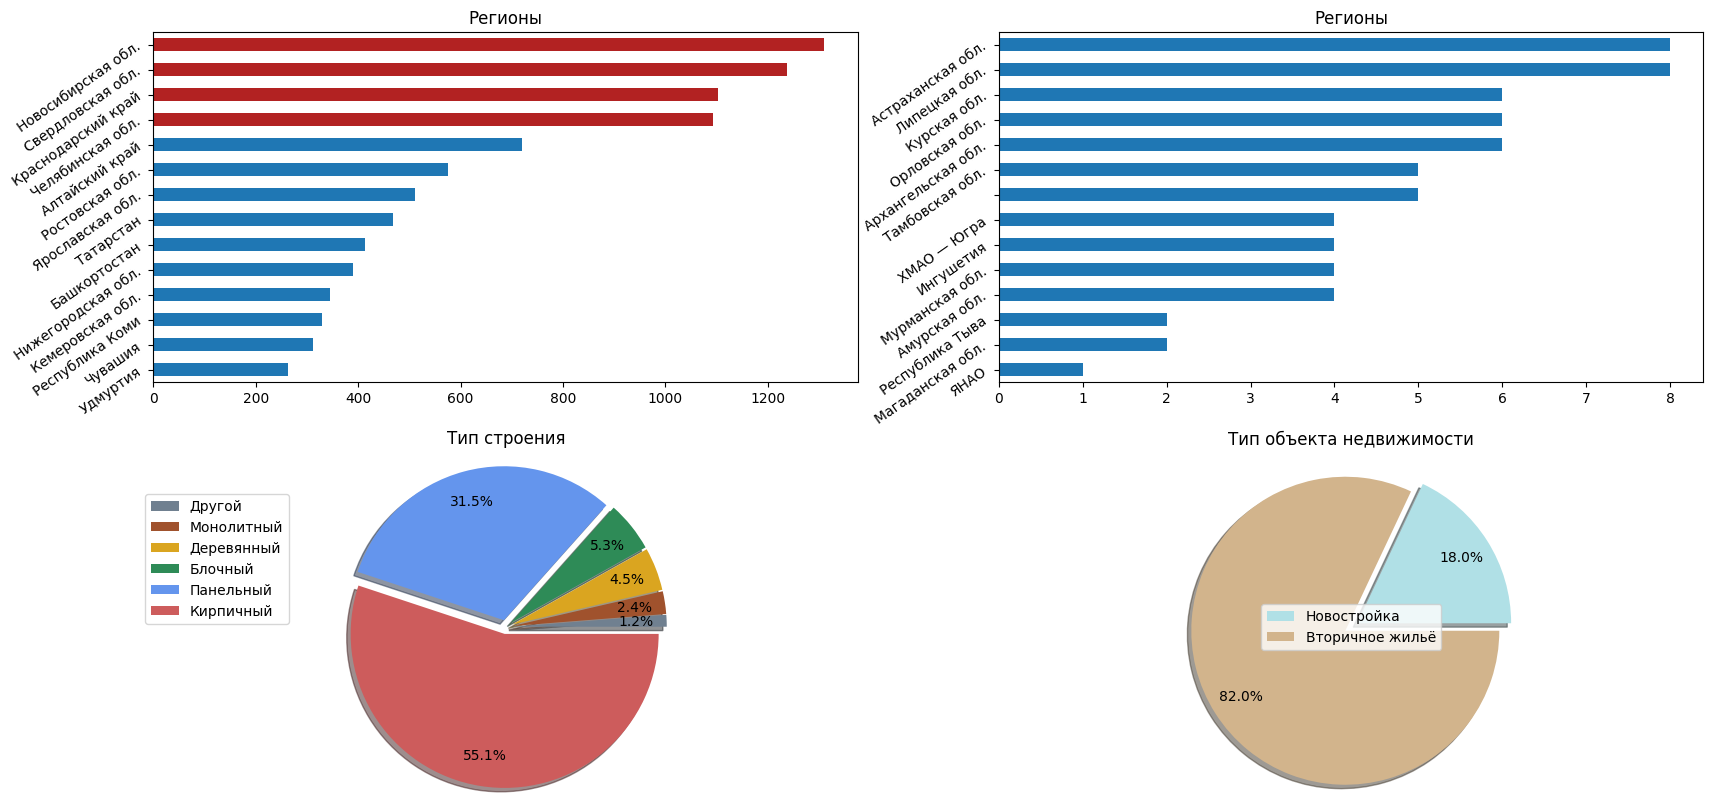

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4','firebrick','firebrick','firebrick','firebrick']
df_remL['region_name'].value_counts().head(14).sort_values().plot(kind='barh', color=colors, ax=ax1)
ax1.tick_params(axis='y', labelrotation=35)
ax1.set_title("Регионы")
#[-14:]

df_remL['region_name'].value_counts().tail(14).sort_values().plot(kind='barh', ax=ax2)
ax2.tick_params(axis='y', labelrotation=35)
ax2.set_title("Регионы")

colors = ['slategray', 'sienna', 'goldenrod', 'seagreen', 'cornflowerblue','indianred']
df_remL['building_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05,0.05, 0.05,0.05, 0.05],
                                                           shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax3)
ax3.legend(bbox_to_anchor=(-0.1, 0.9), loc='upper right')
ax3.set_title("Тип строения")

colors = ['powderblue', 'tan']
df_remH['object_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05],
                                                         shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax4)
ax4.set_title("Тип объекта недвижимости")
plt.show()

Text(0.5, 1.0, 'Этаж')

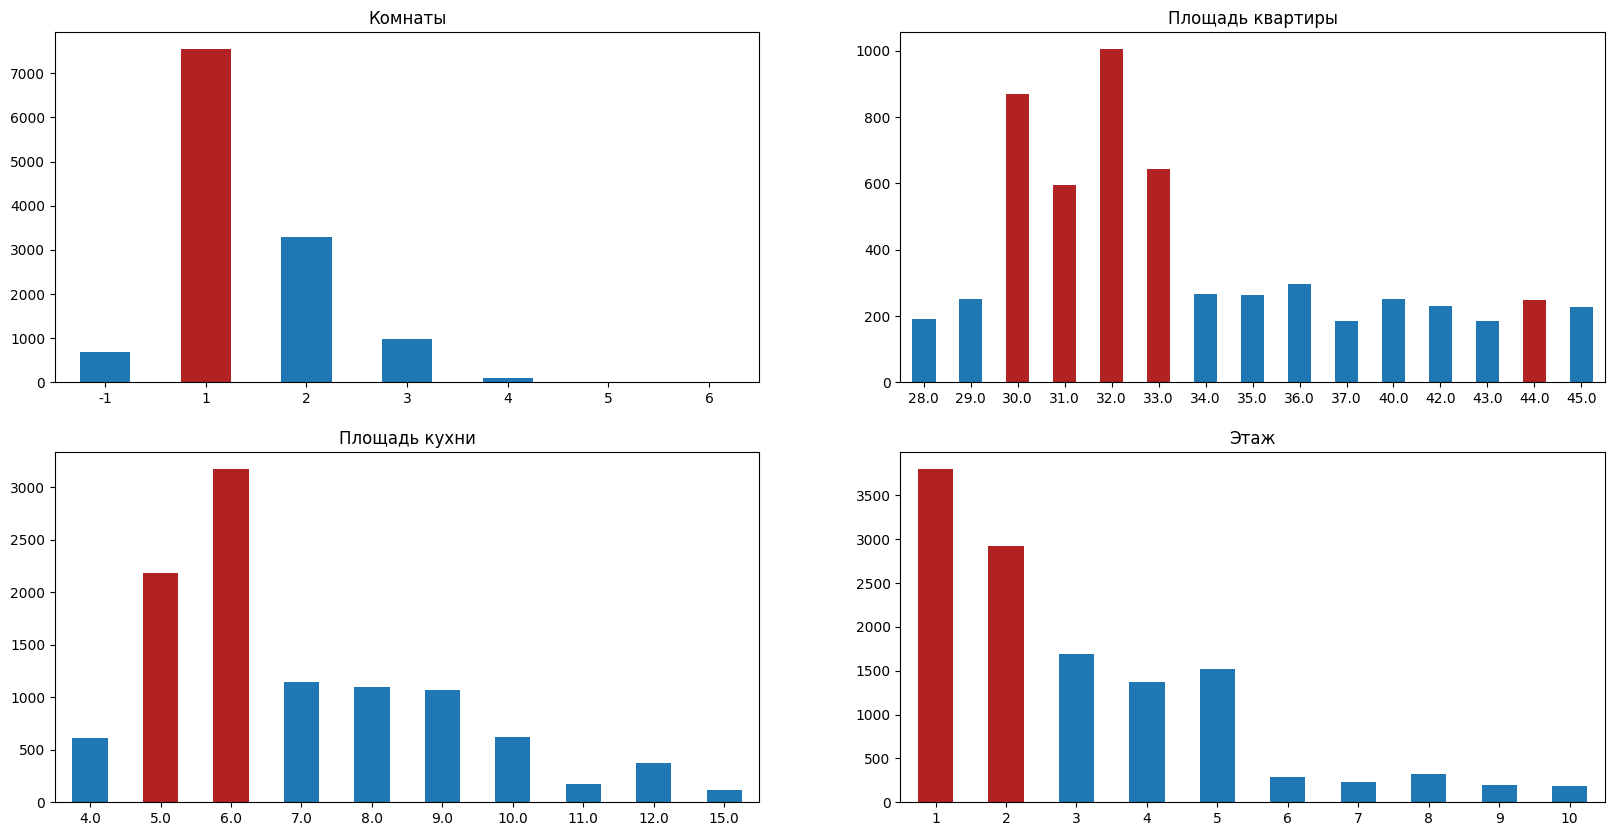

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4']
df_remL['rooms'].value_counts().sort_index().plot(kind='bar', color = colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Комнаты")

df_remL['area'] = np.where(df_remL['area'] == 33.580002, 33, df_remL['area'])
df_remL['area'] = np.where(df_remL['area'] == 32.470001, 32, df_remL['area'])

colors = ['#1f77b4','#1f77b4','firebrick','firebrick','firebrick','firebrick', '#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','firebrick','#1f77b4']
df_remL['area'].value_counts().head(15).sort_index().plot(kind='bar', color = colors, ax=ax2)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_title("Площадь квартиры")


#df_remL['kitchen_area'] = np.where(df_remL['kitchen_area'] == 5.5, 5, df_remL['kitchen_area'])
df_remL['kitchen_area'] = np.where(df_remL['kitchen_area'] == 6.5, 6, df_remL['kitchen_area'])
#df_remL['kitchen_area'] = np.where(df_remL['kitchen_area'] == 7.5, 8, df_remL['kitchen_area'])

colors = ['#1f77b4', 'firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4', '#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4']
df_remL['kitchen_area'].value_counts().head(10).sort_index().plot(kind='bar', color = colors, ax=ax3)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_title("Площадь кухни")

colors = ['firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4']
df_remL['level'].value_counts()[:10].sort_index().plot(kind='bar', color = colors, ax=ax4)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_title("Этаж")
plt.show()

In [ ]:
#датафрейм - только Москва и СПб
df_msk=df_jnd[(df_jnd['region_name'] == "Москва") | (df_jnd['region_name'] == "Санкт-Петербург")]

In [ ]:
#статистические данные Мск + СПб
df_msk.price.describe(percentiles=[.025, 0.99]).to_frame().T

,count,mean,std,min,2.5%,50%,99%,max
price,155164.0,8.494138e+06,1.369083e+07,500.0,1700000.0,6087155.0,47000000.0,1.700000e+09


In [ ]:
#Аномальный объект(advert=434206)
df_msk.sort_values(by='price', ascending=False).head(3)

,advert,price,date,time,geo_lat_x,geo_lon_x,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name
424295,434206,1700000000,2020-06-28,06:05:32,59.828849,30.403921,2661,Панельный,8,9,2,52.0,7.0,Вторичное жильё,Санкт-Петербург
561125,574477,985773064,2021-03-31,08:34:09,55.757572,37.590569,3,Монолитный,6,7,5,640.0,25.0,Вторичное жильё,Москва
408395,417978,813647987,2020-06-01,13:54:36,55.723774,37.583096,3,Монолитный,11,11,5,424.7,25.0,Вторичное жильё,Москва


In [ ]:
#удаляются данные <2.5 и >99.8 перцентилей
df_msk=df_msk.loc[(df_msk["price"] > 1700000) & (df_msk["price"] <= 47000000)]

In [ ]:
#самые дорогие и самые дешевые квартиры Мск + СПб
df_msk.price.describe(percentiles=[.065, 0.96]).to_frame().T

,count,mean,std,min,6.5%,50%,96%,max
price,149711.0,7.773372e+06,5.772246e+06,1701000.0,2700000.0,6150000.0,20300000.0,47000000.0


In [ ]:
#самые дорогие квартиры Мск + СПб
df_mskH=df_msk.loc[df_msk["price"] > 20300000]

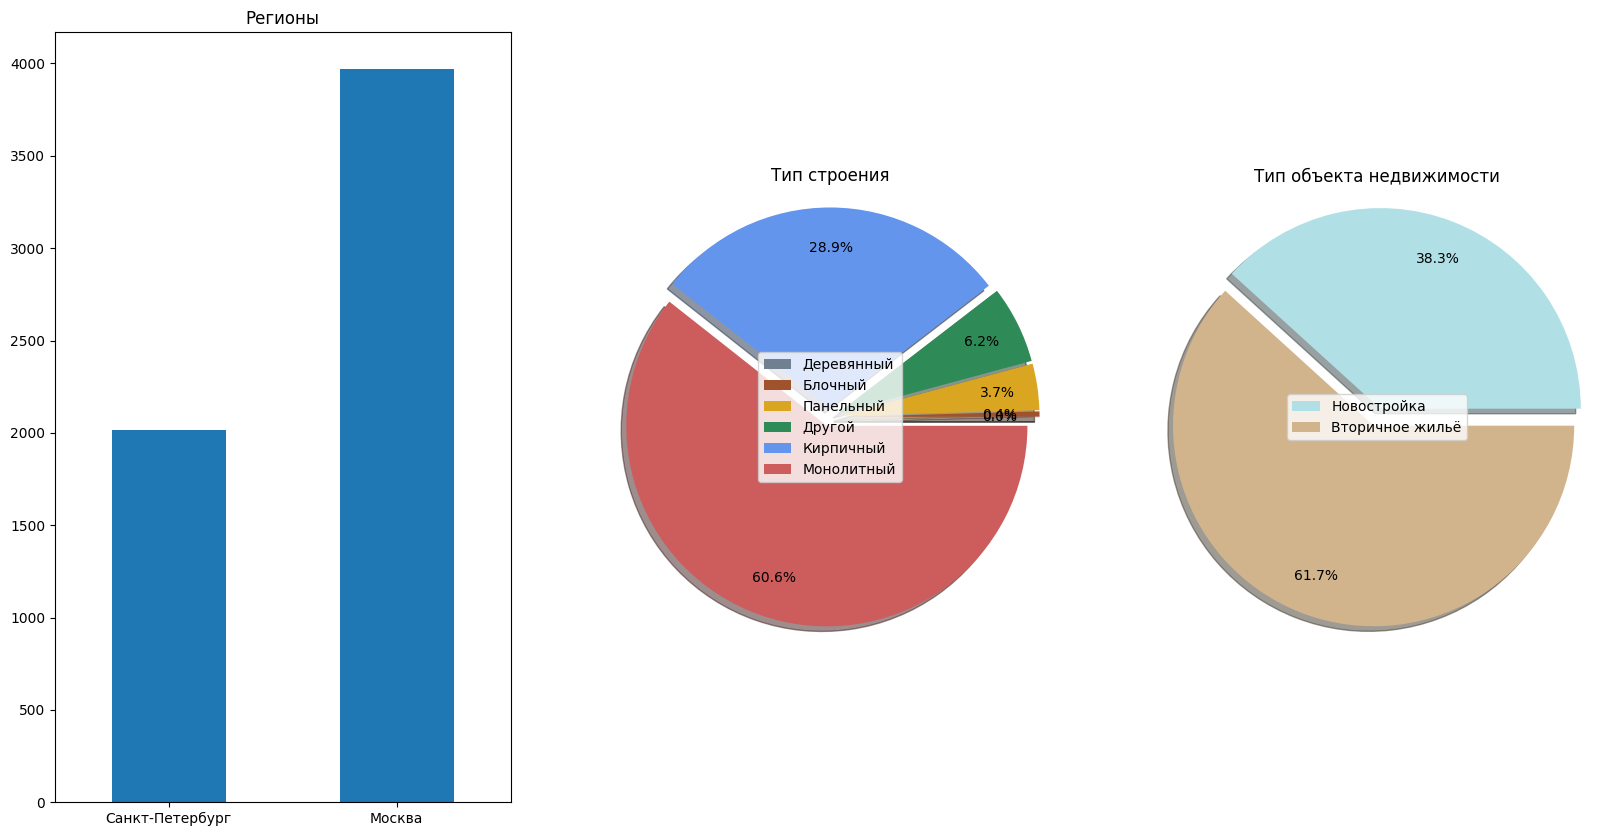

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
ax1, ax2, ax3 = axes.flatten()

colors = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4','firebrick','firebrick','firebrick','firebrick']
df_mskH['region_name'].value_counts()[:14].sort_values().plot(kind='bar', color=colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Регионы")

colors = ['slategray', 'sienna', 'goldenrod', 'seagreen', 'cornflowerblue','indianred']
df_mskH['building_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05,0.05, 0.05,0.05, 0.05],
                                                           shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax2)
ax2.set_title("Тип строения")
ax2.legend(loc='center')

colors = ['powderblue', 'tan']
df_mskH['object_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05],
                                                         shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax3)
ax3.set_title("Тип объекта недвижимости")
ax3.legend(loc='center')
plt.show()

Text(0.5, 1.0, 'Этаж')

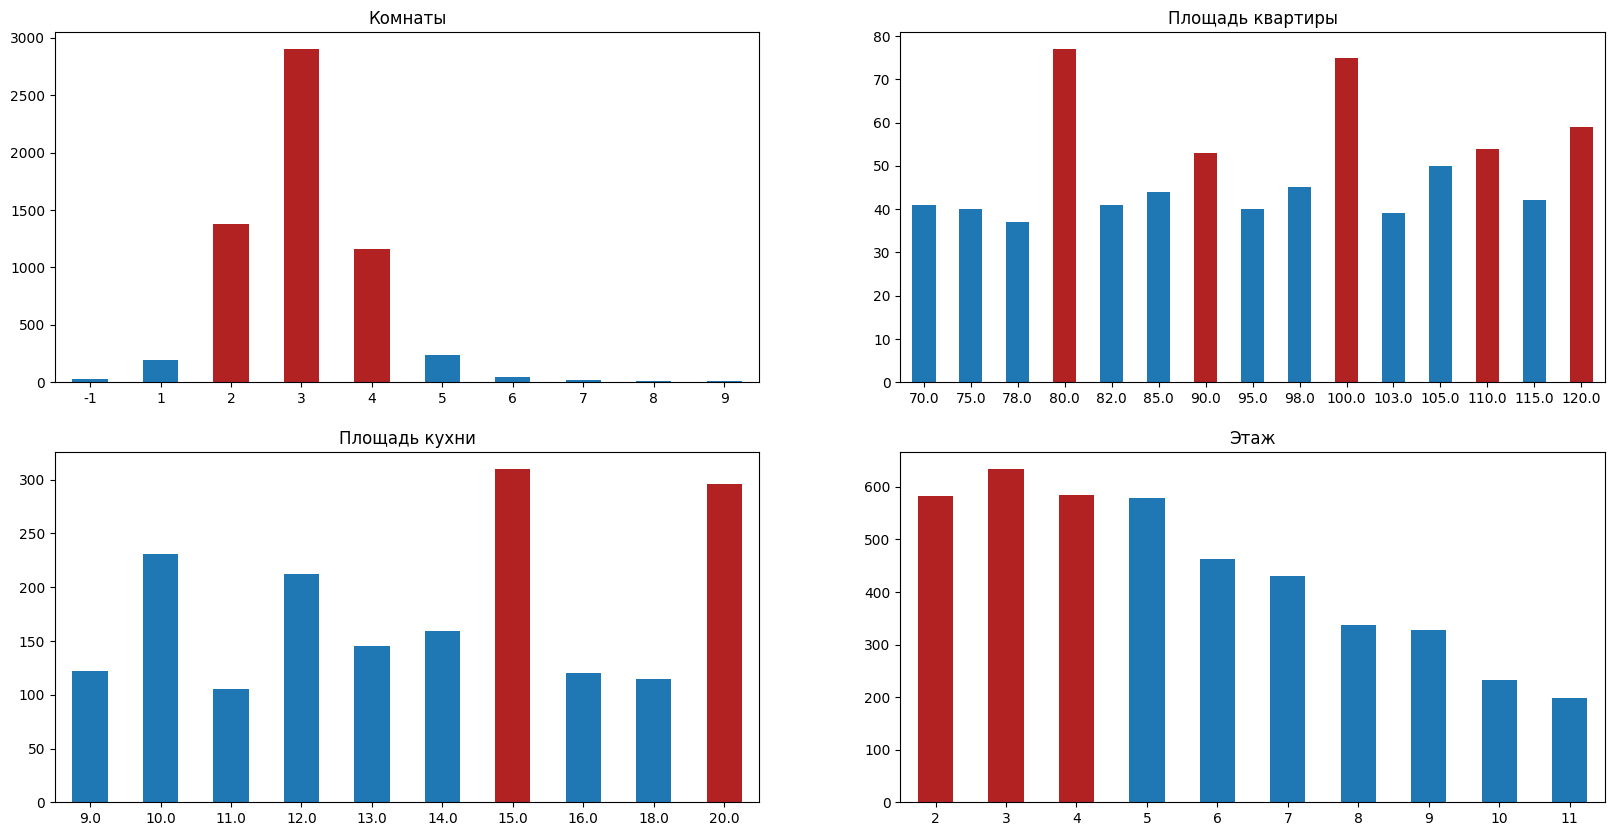

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4','#1f77b4','firebrick','firebrick','firebrick','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4']
df_mskH['rooms'].value_counts().sort_index().plot(kind='bar', color=colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Комнаты")

colors = ['#1f77b4','#1f77b4','#1f77b4','firebrick', '#1f77b4','#1f77b4', 'firebrick',
          '#1f77b4','#1f77b4','firebrick', '#1f77b4','#1f77b4', 'firebrick', '#1f77b4', 'firebrick']
df_mskH['area'].value_counts().head(15).sort_index().plot(kind='bar', color=colors, ax=ax2)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_title("Площадь квартиры")

colors = ['#1f77b4', '#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4', 'firebrick',
          '#1f77b4','#1f77b4','firebrick']
df_mskH['kitchen_area'].value_counts().head(10).sort_index().plot(kind='bar', color=colors, ax=ax3)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_title("Площадь кухни")

colors = ['firebrick','firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4']
df_mskH['level'].value_counts()[:10].sort_index().plot(kind='bar', color=colors, ax=ax4)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_title("Этаж")
plt.show()

In [ ]:
#самые дешевые квартиры Мск + СПб
df_mskL=df_msk.loc[df_msk["price"] <= 2700000]

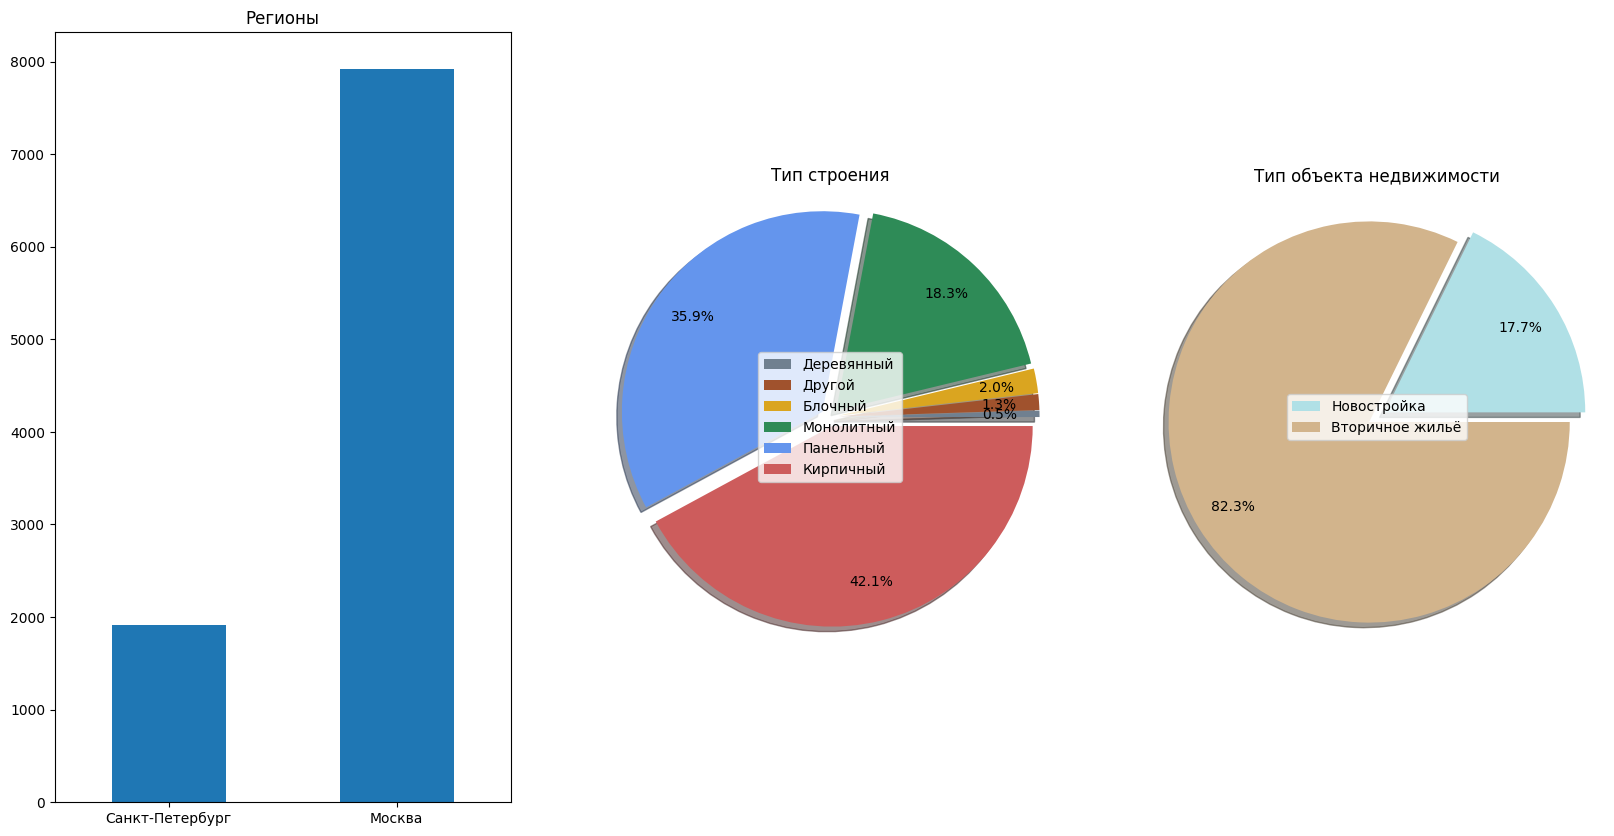

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
ax1, ax2, ax3 = axes.flatten()

colors = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4','firebrick','firebrick','firebrick','firebrick']
df_mskL['region_name'].value_counts()[:14].sort_values().plot(kind='bar', color=colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Регионы")

colors = ['slategray', 'sienna', 'goldenrod', 'seagreen', 'cornflowerblue','indianred']
df_mskL['building_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05,0.05, 0.05,0.05, 0.05],
                                                           shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax2)
ax2.set_title("Тип строения")
ax2.legend(loc='center')

colors = ['powderblue', 'tan']
df_mskL['object_type'].value_counts().sort_values().plot(kind='pie', radius=1.1, pctdistance=0.8, explode=[0.05, 0.05],
                                                         shadow=True, autopct='%1.1f%%', colors=colors, legend=True, ylabel='', labeldistance=None, ax=ax3)
ax3.set_title("Тип объекта недвижимости")
ax3.legend(loc='center')
plt.show()

Text(0.5, 1.0, 'Этаж')

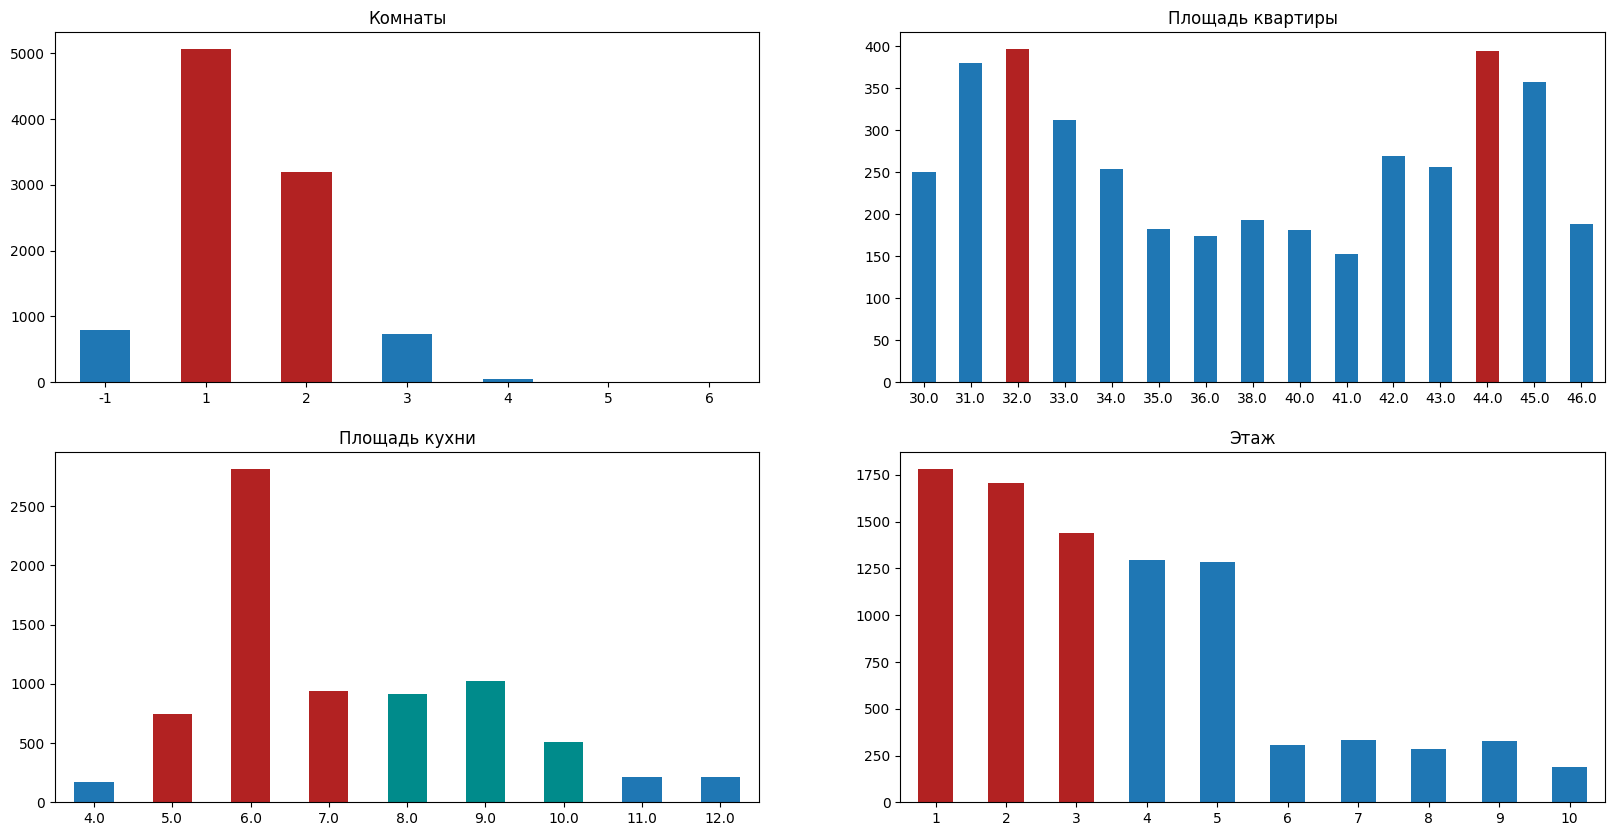

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['#1f77b4', 'firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4']
df_mskL['rooms'].value_counts().sort_index().plot(kind='bar', color=colors, ax=ax1)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title("Комнаты")

colors = ['#1f77b4','#1f77b4','firebrick','#1f77b4', '#1f77b4','#1f77b4', '#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4', '#1f77b4','#1f77b4', 'firebrick', '#1f77b4', '#1f77b4']
df_mskL['area'].value_counts().head(15).sort_index().plot(kind='bar', color=colors, ax=ax2)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_title("Площадь квартиры")

colors = ['#1f77b4','firebrick','firebrick','firebrick','darkcyan', 'darkcyan','darkcyan',
          '#1f77b4','#1f77b4']
df_mskL['kitchen_area'].value_counts().head(9).sort_index().plot(kind='bar', color=colors, ax=ax3)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_title("Площадь кухни")

colors = ['firebrick','firebrick','firebrick','#1f77b4','#1f77b4','#1f77b4','#1f77b4',
          '#1f77b4','#1f77b4','#1f77b4']
df_mskL['level'].value_counts()[:10].sort_index().plot(kind='bar', color=colors, ax=ax4)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_title("Этаж")
plt.show()

**Cезонность в динамике количества опубликованных объявлений**

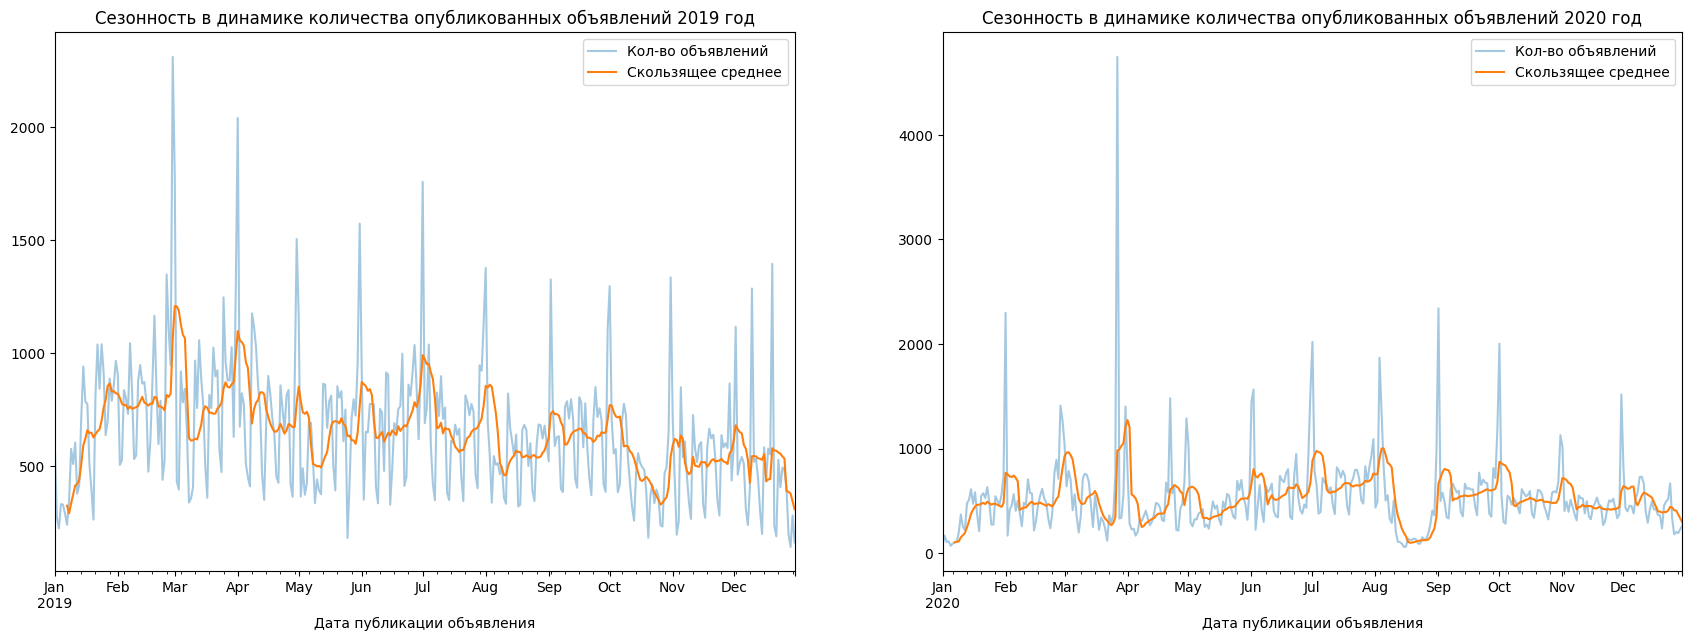

In [ ]:
y2019=df[df['date'].str.match('2019')]
y2019['date']= pd.to_datetime(y2019['date'])

y2019.rename(columns={'Unnamed: 0':'advert'}, inplace=True)
y2019.set_index('date', inplace=True)
y2019=y2019['advert'].to_frame()

y2020=df[df['date'].str.match('2020')]
y2020['date']= pd.to_datetime(y2020['date'])

y2020.rename(columns={'Unnamed: 0':'advert'}, inplace=True)
y2020.set_index('date', inplace=True)
y2020=y2020['advert'].to_frame()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(21, 7))
ax1, ax2 = axes.flatten()

count19=y2019.groupby('date').count()['advert']

count19.plot(alpha = 0.4, label = 'Кол-во объявлений', ax=ax1)
count19.rolling(7).mean().plot(label = 'Скользящее среднее', ax=ax1)
ax1.set_xlabel('Дата публикации объявления')
ax1.set_title("Cезонность в динамике количества опубликованных объявлений 2019 год")
ax1.legend()

count20=y2020.groupby('date').count()['advert']

count20.plot(alpha = 0.4, label = 'Кол-во объявлений', ax=ax2)
count20.rolling(7).mean().plot(label = 'Скользящее среднее', ax=ax2)
ax2.set_xlabel('Дата публикации объявления')
ax2.set_title("Cезонность в динамике количества опубликованных объявлений 2020 год")
ax2.legend()
plt.show()

**Измение рынка недвижимости и динамика роста цен на недвижимость, регионы**

In [ ]:
#дф квадратные метры; регионы
df_rem_m2=df_rem
df_rem_m2['price_m2'] = df_rem_m2['price'].div(df_rem_m2['area'].values)
df_rem_m2['price_m2'] = df_rem_m2['price_m2'].round()
#display(df_rem_m2.sort_values(by='price', ascending=False))

In [ ]:
#динамика роста цен на квадратные метры; регионы
dynReg = df_rem_m2[['date', 'price_m2']]

dynReg['date']= pd.to_datetime(dynReg['date'])
dynReg = dynReg.loc[(dynReg['date'] >= '2018-09-01') & (dynReg['date'] < '2021-05-01')]
dynReg.set_index('date', inplace=True)

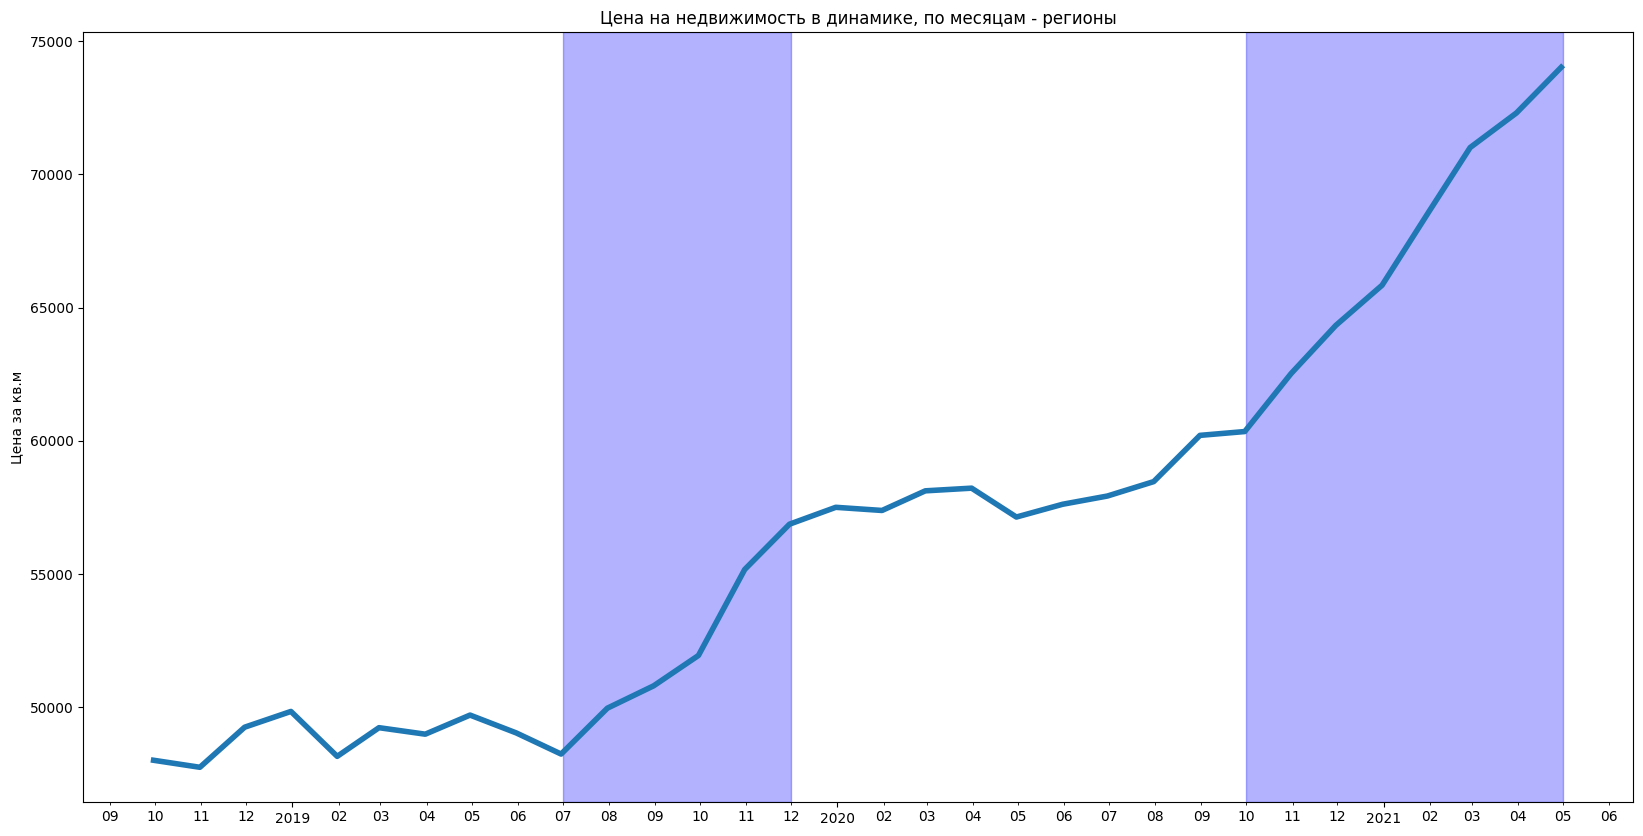

In [ ]:
#linear graph динамика роста цен на квадратные метры; Москва и Санкт-Петербург
mean_dynReg=dynReg.groupby(pd.Grouper(freq='M')).mean()['price_m2']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(mean_dynReg, linewidth=4)
ax.set_ylabel("Цена за кв.м")
ax.set_title("Цена на недвижимость в динамике, по месяцам - регионы")

ax.axvspan('2019-07', '2019-12', color="blue", alpha=0.3)
ax.axvspan('2020-10', '2021-05', color="blue", alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator());
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator());
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.show()

In [ ]:
#дф квадратные метры 2019-2020; регионы
m2_reg2019=df_rem_m2[df_rem_m2['date'].str.match('2019')]
m2_reg2020=df_rem_m2[df_rem_m2['date'].str.match('2020')]

#только вторичное жилье
m2_reg2019=m2_reg2019[m2_reg2019['object_type'].str.match('Вторичное жильё')]
m2_reg2020=m2_reg2020[m2_reg2020['object_type'].str.match('Вторичное жильё')]

In [ ]:
#mean квадратные метры 2019-2020; регионы
mean_m2_reg2019=m2_reg2019.groupby('region_name').mean()['price_m2']
mean_m2_reg2020=m2_reg2020.groupby('region_name').mean()['price_m2']
mean_m2_reg2019 = mean_m2_reg2019.round()
mean_m2_reg2020 = mean_m2_reg2020.round()
#mean_m2_reg2019.sort_values().info

In [ ]:
#mean квадратные метры 2019-2020; регионы; shape -> dataframe
mean_m2_reg2019=mean_m2_reg2019.to_frame()
mean_m2_reg2020=mean_m2_reg2020.to_frame()

In [ ]:
#merge "count новостройки 2019-2020; регионы"
mean_m2_regJnd=mean_m2_reg2020.merge(mean_m2_reg2019, on='region_name', how='left')
#переименованы столбцы
mean_m2_regJnd.rename(columns={'price_m2_x':'Цена_м2_2020', 'price_m2_y':'Цена_м2_2019'}, inplace=True)
mean_m2_regJnd.reset_index(inplace=True)
#изменён порядок столбцов в дф
mean_m2_regJnd=mean_m2_regJnd[['region_name','Цена_м2_2019','Цена_м2_2020']]
#mean_m2_regJnd.info()

In [ ]:
# NaN -> 0
mean_m2_regJnd['Цена_м2_2019'].fillna(0, inplace = True)

Text(0.5, 0, 'РЕГИОНЫ')

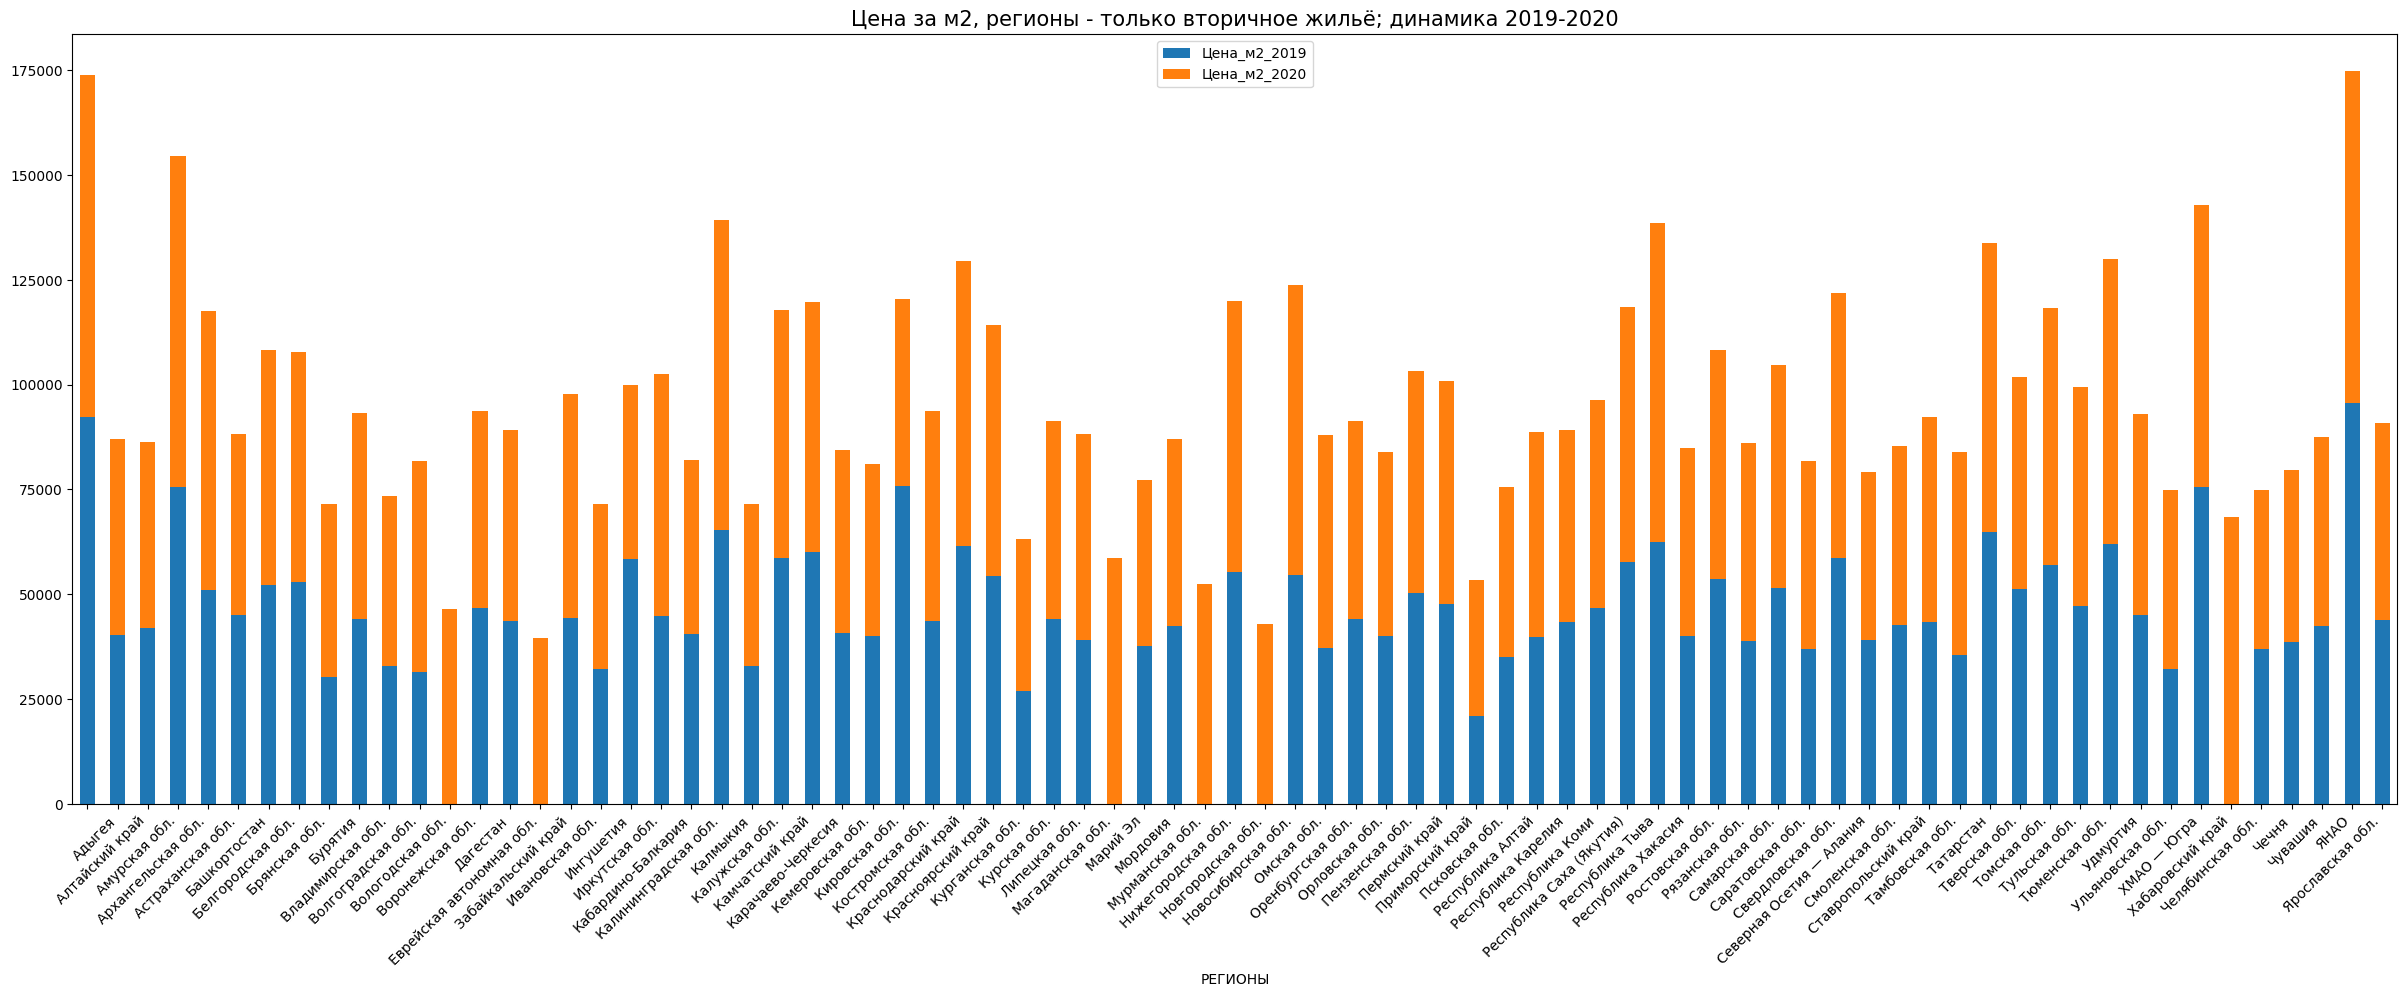

In [ ]:
ax=mean_m2_regJnd.plot.bar(x='region_name', stacked=True, figsize=(30, 10))
ax.set_title('Цена за м2, регионы - только вторичное жильё; динамика 2019-2020', fontsize=15)
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(ha='right')
ax.set_xlabel('РЕГИОНЫ')
plt.show()

In [ ]:
#новостройки 2019-2020; регионы
RgnNov=df_rem.loc[df_rem['object_type'] == 'Новостройка']
RgnNov2019=RgnNov[RgnNov['date'].str.match('2019')]
RgnNov2020=RgnNov[RgnNov['date'].str.match('2020')]
#RgnNov2019.info()

In [ ]:
#count новостройки 2019-2020; регионы
cnt_RegNov2019=RgnNov2019.groupby('region_name').count()['advert']
cnt_RegNov2020=RgnNov2020.groupby('region_name').count()['advert']

In [ ]:
#count новостройки 2019-2020; регионы; shape -> dataframe
cnt_RegNov2019=cnt_RegNov2019.to_frame()
cnt_RegNov2020=cnt_RegNov2020.to_frame()

In [ ]:
#merge "count новостройки 2019-2020; регионы"
cnt_RegNovJnd=cnt_RegNov2020.merge(cnt_RegNov2019, on='region_name', how='left')
cnt_RegNovJnd.rename(columns={'advert_x':'Новостройки_2020', 'advert_y':'Новостройки_2019'}, inplace=True)
cnt_RegNovJnd.reset_index(inplace=True)
cnt_RegNovJnd=cnt_RegNovJnd[['region_name','Новостройки_2019','Новостройки_2020']]

In [ ]:
# NaN -> 0
cnt_RegNovJnd['Новостройки_2019'].fillna(0, inplace = True)

Text(0.5, 0, 'РЕГИОНЫ')

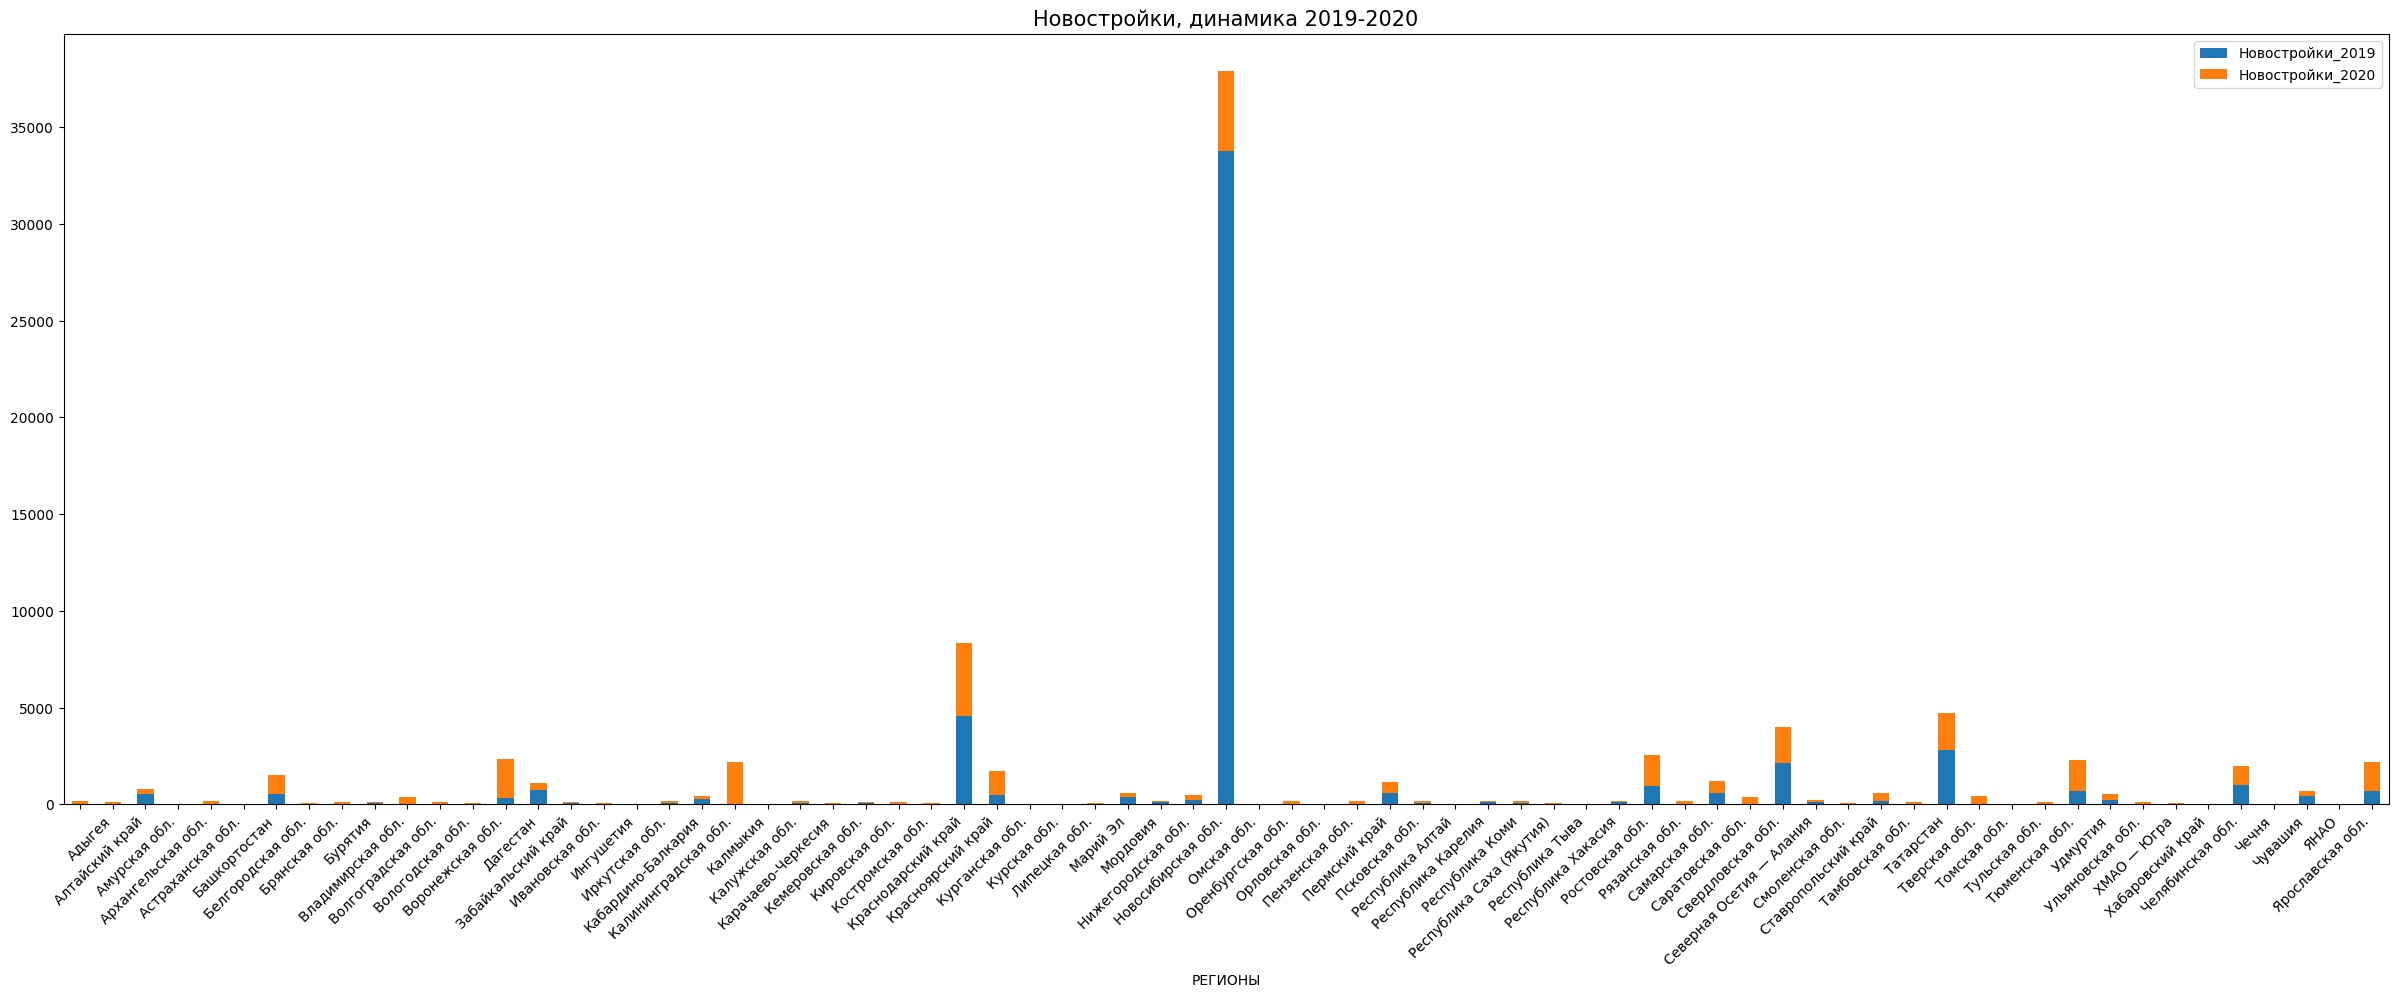

In [ ]:
ax=cnt_RegNovJnd.plot.bar(x='region_name', stacked=True, figsize=(30, 10))
ax.set_title('Новостройки, динамика 2019-2020', fontsize=15)
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(ha='right')
ax.set_xlabel('РЕГИОНЫ')
plt.show()

**Измение рынка недвижимости и динамики роста цен на недвижимость, Москва и Санкт-Петербург**

In [ ]:
#дф квадратные метры; Москва и Санкт-Петербург
df_msk_m2=df_msk
df_msk_m2['price_m2'] = df_msk_m2['price'].div(df_msk_m2['area'].values)
df_msk_m2['price_m2'] = df_msk_m2['price_m2'].round()
#display(df_msk_m2.sort_values(by='price', ascending=False))

In [ ]:
#динамика роста цен на квадратные метры; Москва и Санкт-Петербург
dynMsk = df_msk_m2[['date', 'price_m2']]

dynMsk['date']= pd.to_datetime(dynMsk['date'])
dynMsk = dynMsk.loc[(dynMsk['date'] >= '2018-09-01') & (dynMsk['date'] < '2021-05-01')]
dynMsk.set_index('date', inplace=True)

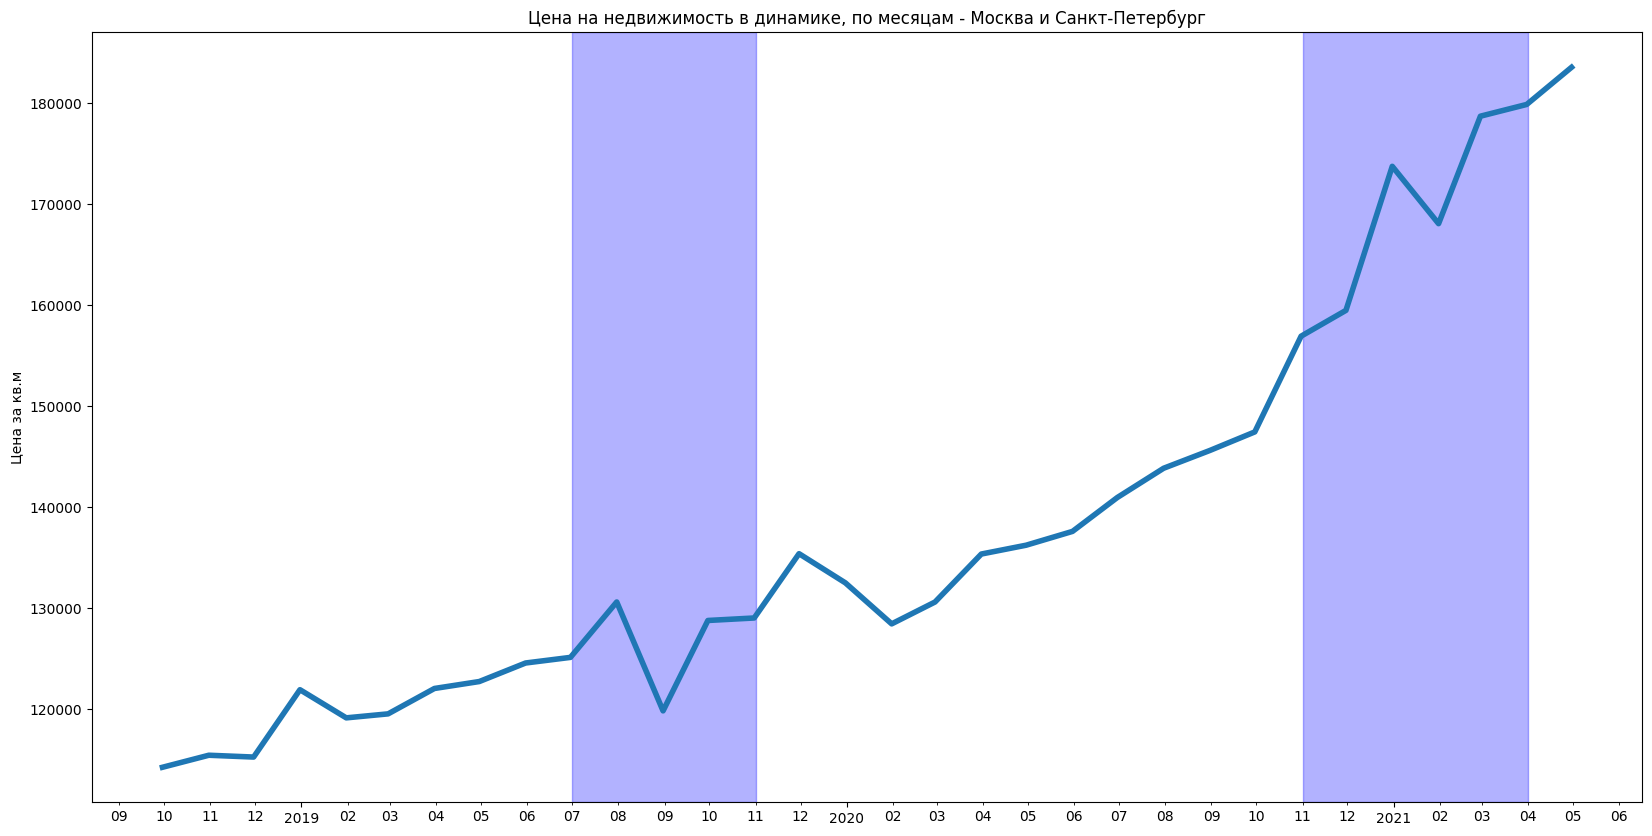

In [ ]:
#linear graph динамика роста цен на квадратные метры; Москва и Санкт-Петербург
mean_dynMsk=dynMsk.groupby(pd.Grouper(freq='M')).mean()['price_m2']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(mean_dynMsk, linewidth=4)
ax.set_ylabel("Цена за кв.м")
ax.set_title("Цена на недвижимость в динамике, по месяцам - Москва и Санкт-Петербург")

ax.axvspan('2019-07', '2019-11', color="blue", alpha=0.3)
ax.axvspan('2020-11', '2021-04', color="blue", alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator());
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator());
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.show()

In [ ]:
#дф квадратные метры 2019-2020; Москва и Санкт-Петербург
m2_msk2019=df_msk_m2[df_msk_m2['date'].str.match('2019')]
m2_msk2020=df_msk_m2[df_msk_m2['date'].str.match('2020')]

#только вторичное жилье
m2_msk2019=m2_msk2019[m2_msk2019['object_type'].str.match('Вторичное жильё')]
m2_msk2020=m2_msk2020[m2_msk2020['object_type'].str.match('Вторичное жильё')]

In [ ]:
#mean квадратные метры 2019-2020; Москва и Санкт-Петербург
mean_m2_msk2019=m2_msk2019.groupby('region_name').mean()['price_m2']
mean_m2_msk2020=m2_msk2020.groupby('region_name').mean()['price_m2']
mean_m2_msk2019 = mean_m2_msk2019.round()
mean_m2_msk2020 = mean_m2_msk2020.round()
#mean_m2_msk2019.sort_values().info

In [ ]:
#mean квадратные метры 2019-2020; Москва и Санкт-Петербург; shape -> dataframe
mean_m2_msk2019=mean_m2_msk2019.to_frame()
mean_m2_msk2020=mean_m2_msk2020.to_frame()

In [ ]:
#присоединены квадратные метры 2019 к 2020; Москва и Санкт-Петербург"
mean_m2_mskJnd=mean_m2_msk2020.merge(mean_m2_msk2019, on='region_name', how='left')
#переименованы столбцы
mean_m2_mskJnd.rename(columns={'price_m2_x':'Цена_м2_2020', 'price_m2_y':'Цена_м2_2019'}, inplace=True)
mean_m2_mskJnd.reset_index(inplace=True)
#изменён порядок столбцов в дф
mean_m2_mskJnd=mean_m2_mskJnd[['region_name','Цена_м2_2019','Цена_м2_2020']]
mean_m2_mskJnd.info()

In [ ]:
#новостройки 2019-2020; Москва и Санкт-Петербург
MskNov=df_msk.loc[df_msk['object_type'] == 'Новостройка']
MskNov2019=MskNov[MskNov['date'].str.match('2019')]
MskNov2020=MskNov[MskNov['date'].str.match('2020')]
#MskNov2019.info()

In [ ]:
#count новостройки 2019-2020; Москва и Санкт-Петербург
cnt_MskNov2019=MskNov2019.groupby('region_name').count()['advert']
cnt_MskNov2020=MskNov2020.groupby('region_name').count()['advert']

In [ ]:
#count новостройки 2019-2020; Москва и Санкт-Петербург; shape -> dataframe
cnt_MskNov2019=cnt_MskNov2019.to_frame()
cnt_MskNov2020=cnt_MskNov2020.to_frame()

In [ ]:
#присоединены новостройки 2019 к 2020; Москва и Санкт-Петербург
cnt_MskNovJnd=cnt_MskNov2020.merge(cnt_MskNov2019, on='region_name', how='left')
cnt_MskNovJnd.rename(columns={'advert_x':'Новостройки_2020', 'advert_y':'Новостройки_2019'}, inplace=True)
cnt_MskNovJnd.reset_index(inplace=True)
cnt_MskNovJnd=cnt_MskNovJnd[['region_name','Новостройки_2019','Новостройки_2020']]

Text(0.5, 0, 'РЕГИОНЫ')

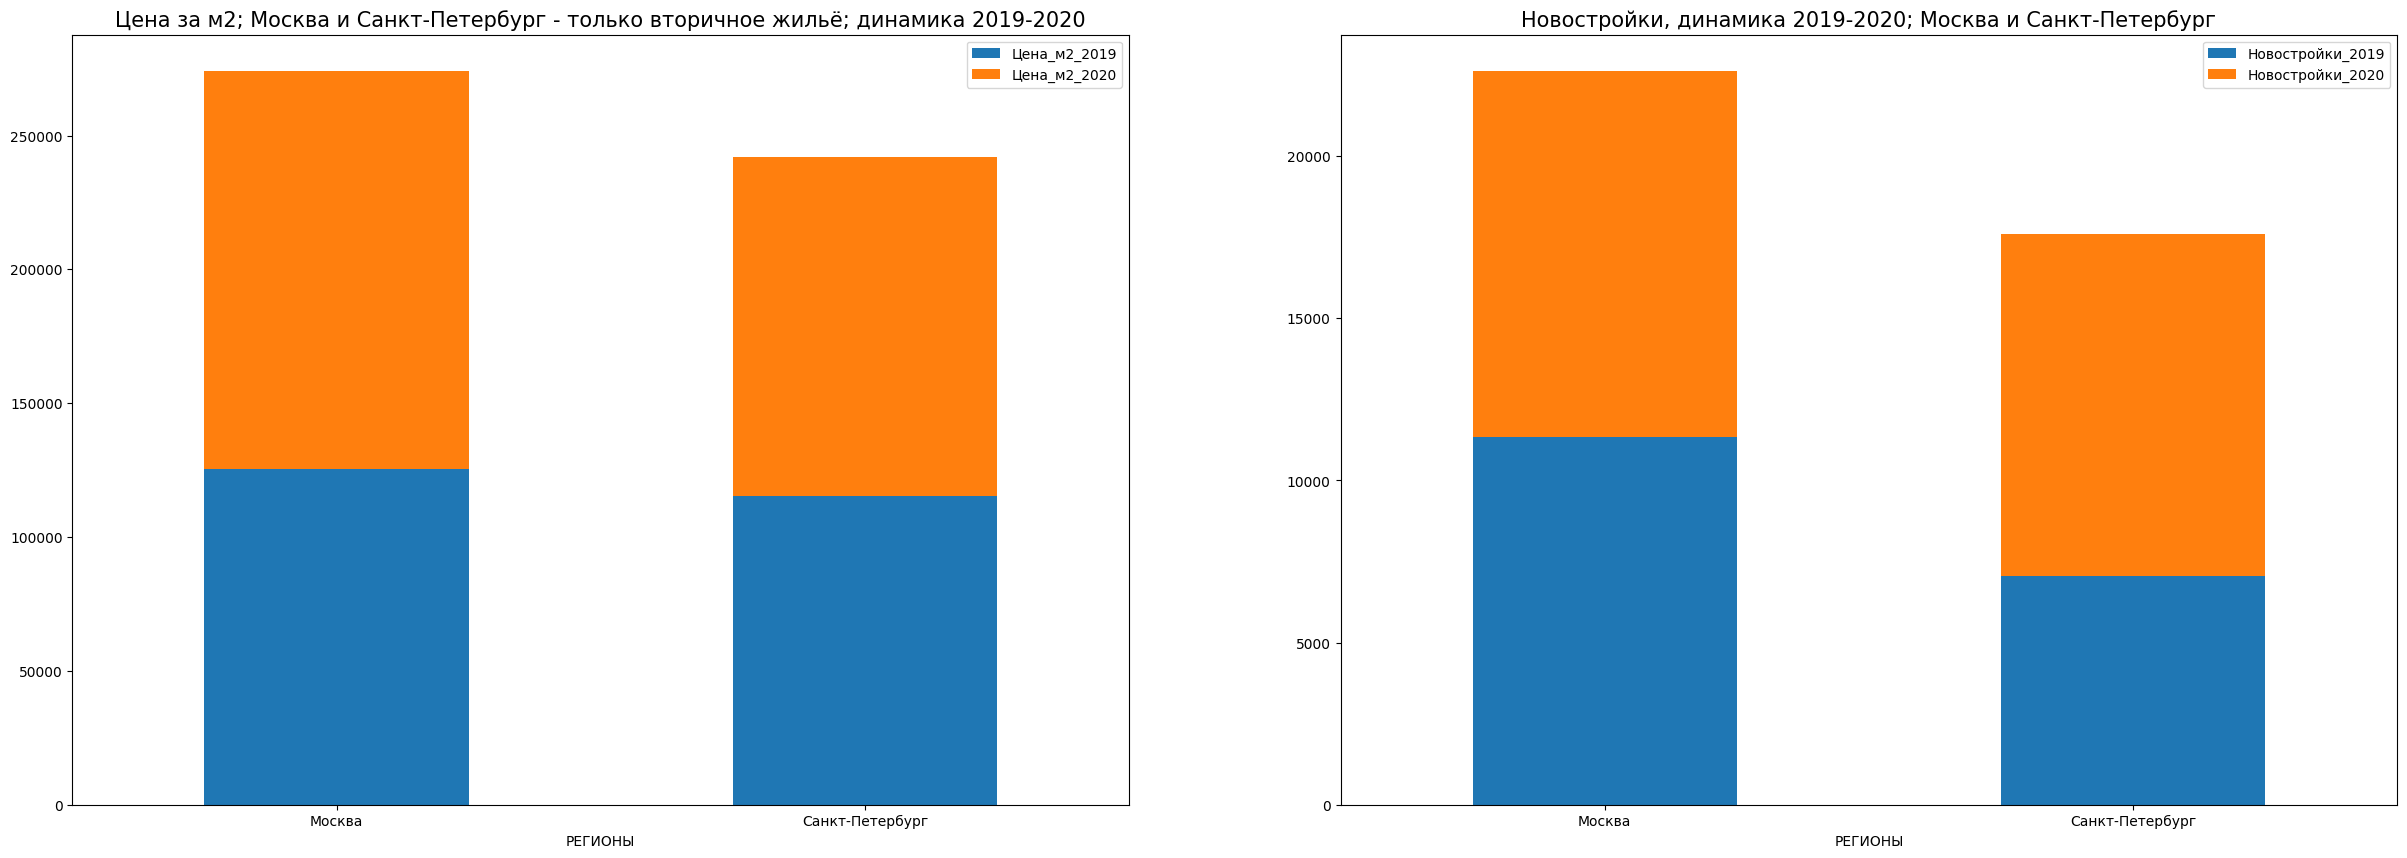

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax1, ax2 = axes.flatten()

mean_m2_mskJnd.plot.bar(x='region_name', stacked=True, figsize=(30, 10), ax=ax1)
ax1.set_title('Цена за м2; Москва и Санкт-Петербург - только вторичное жильё; динамика 2019-2020', fontsize=15)
ax1.tick_params(axis='x', labelrotation=0)

ax1.set_xlabel('РЕГИОНЫ')

cnt_MskNovJnd.plot.bar(x='region_name', stacked=True, figsize=(30, 10), ax=ax2)
ax2.set_title('Новостройки, динамика 2019-2020; Москва и Санкт-Петербург', fontsize=15)
ax2.tick_params(axis='x', labelrotation=0)

ax2.set_xlabel('РЕГИОНЫ')

plt.show()

In [ ]:
#аномальные объекты - цена
display(data[data["price"] <= 0].sort_values(by='price', ascending=False))

In [ ]:
#аномальные объекты - количество комнат
display(data[data['rooms'] < -1])

In [ ]:
#для инвестиции
test=df_rem.loc[df_rem['object_type'] == 'Новостройка']
test.query("region_name == 'Воронежская обл.'").sort_values(by=['price', 'area'], ascending = [True, False]).head(5)

,advert,price,date,time,geo_lat_x,geo_lon_x,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name
70814,72330,714700,2018-12-05,10:35:45,51.716939,39.262362,2072,Кирпичный,10,10,1,20.40,5.0,Новостройка,Воронежская обл.
147161,150308,750000,2019-03-15,21:11:51,51.830941,40.807346,2072,Кирпичный,3,3,2,38.00,7.0,Новостройка,Воронежская обл.
368315,377112,772254,2020-03-14,09:22:11,51.716939,39.262362,2072,Монолитный,13,19,1,20.43,5.0,Новостройка,Воронежская обл.
271297,278230,790000,2019-09-10,14:53:10,51.588874,39.242764,2072,Монолитный,7,19,1,25.00,5.0,Новостройка,Воронежская обл.
293908,301329,800000,2019-10-16,22:34:57,51.717033,39.180210,2072,Кирпичный,9,16,2,47.00,11.0,Новостройка,Воронежская обл.


для Datalens

In [ ]:
df_DL=df_jnd.loc[(df_jnd["price"] > 350000) & (df_jnd["price"] <= 47000000)]

In [ ]:
df_DL['price_m2'] = df_DL['price'].div(df_DL['area'].values)
df_DL['price_m2'] = df_DL['price_m2'].round()

In [ ]:
from google.colab import files

df_DL.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Дашборд в Yandex Datalens

Какие метрики на ваш взгляд ялвяются показательными для оценки состояния рынка недвижимости?

**Список метрик:**
1. Название метрики – обоснование: зачем смотреть на эту метрику?
2. Название метрики – обоснование: зачем смотреть на эту метрику?  
...

На основе имеющихся данных вам необходимо вывести эти метрики в BI-систему Yandex Datalens и прикрепить ссылку на дашборд ниже.

1. Цена за квадратный метр вторичного жилья – вторичное жильё в отличие от новостроек это уже готовый продукт цену на который устанавливают множество независимых продавцов, в отличие от рынка новостроек где застройщик контролирует цену на все квартиры в доме, поэтому цена за квадратный метр вторичного жилья это хороший показатель роста рынка недвижимости.
2. Количество новостроек – рост рынка недвижимости маловероятен при плохой социально-экономической ситуации в регионе. Компания застройщик не станет инвестировать в такие регионы, поэтому большое количество новостроек указывает на благоприятную социально-экономической ситуацию, что в свою очередь повлечёт рост рынка недвижимости.

https://datalens.yandex/t2igxugvnylej